In [20]:
%run Function_set_dic_cqm.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [21]:
from collections import defaultdict

#from dwave.system.samplers import DWaveSampler
#from dwave.system.composites import EmbeddingComposite
from dwave.cloud import Client
client = Client.from_config(token='DEV-a3f87cd2fb51d10601c4e8bd16114d92614fc291')     
print(client.get_solvers() )

import networkx as nx
import numpy as np
#import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

[StructuredSolver(id='DW_2000Q_6'), StructuredSolver(id='Advantage_system6.1'), StructuredSolver(id='Advantage2_prototype1.1'), StructuredSolver(id='Advantage_system4.1')]


In [22]:

network,pos = Make_Question(3,3,Density = 0.85, option = "1-norm", distance = 2)
print(network)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (1, 2): '7', (1, 3): '8', (2, 4): '10', (3, 4): '12', (4, 5): '15', (4, 6): '16', (5, 7): '18', (6, 7): '20', (2, 1): '9', (3, 1): '11', (4, 2): '13', (4, 3): '14', (5, 4): '17', (6, 4): '19', (7, 5): '21', (7, 6): '22'}


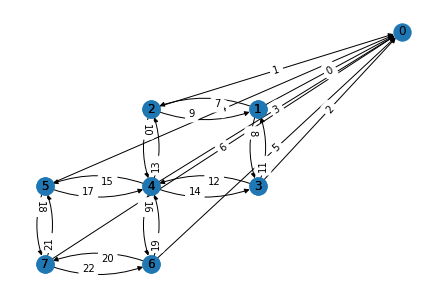

In [23]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

In [24]:
compelete_label

{(1, 0): '0',
 (2, 0): '1',
 (3, 0): '2',
 (4, 0): '3',
 (5, 0): '4',
 (6, 0): '5',
 (7, 0): '6',
 (1, 2): '7',
 (1, 3): '8',
 (2, 4): '10',
 (3, 4): '12',
 (4, 5): '15',
 (4, 6): '16',
 (5, 7): '18',
 (6, 7): '20',
 (2, 1): '9',
 (3, 1): '11',
 (4, 2): '13',
 (4, 3): '14',
 (5, 4): '17',
 (6, 4): '19',
 (7, 5): '21',
 (7, 6): '22'}

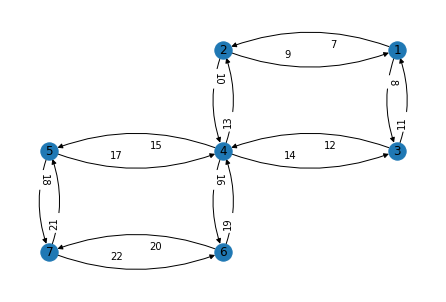

In [25]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

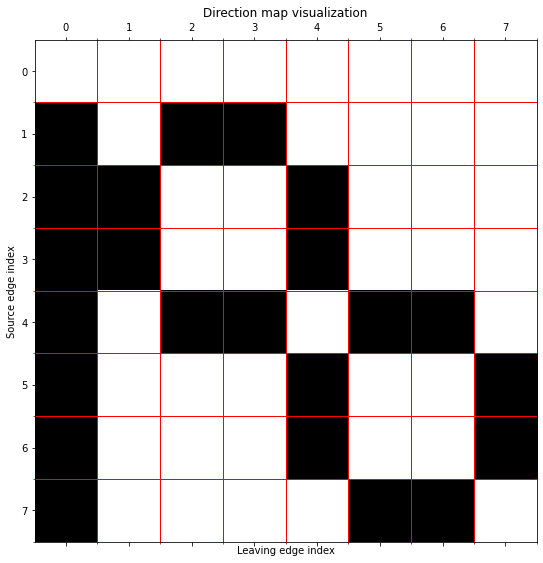

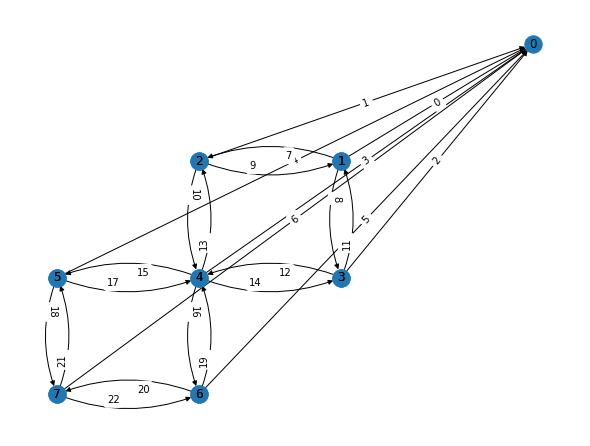

In [26]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [27]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

N_tree = capacity_subtree_limit_generator(pos,Q)

4 6


In [80]:
print(Q)

# How many edges
edge_number = len(compelete_label)


# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
# test case : #basic_cost = np.arange(edge_number)

basic_cost = np.ones(edge_number) * 2


# flow cost (p)
flow_cost = np.ones(edge_number) 
p = 1


# make dictionary
edge_dictionary, Total = make_dictionary(edge_number, Q, N_tree)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((Total, Total))


print('N_tree  = ', N_tree )
#print('edge_dictionary  = ', edge_dictionary )

7
N_tree  =  [5 6]


In [81]:
s = [dimod.Binary(f's_{j}') for j in range(len(N_tree))]
x = [[dimod.Binary(f'x_{m}_{n}') for n in range(1,Q+1)] for m in range(edge_number)]

#print(s)
#print(len(x))
#print(x)

In [82]:
#x = [[dimod.Binary(f'x_{m}_{n}') for m in range(edge_number)] for n in range(1,Q+1)]
cqm = dimod.ConstrainedQuadraticModel()
#print(edge_dictionary)

In [83]:
c_e = (np.tile(np.vstack(basic_cost),(1,Q+1))).flatten()
        
level_coeff = (np.tile(np.arange(1,Q + 1),(edge_number,1))).flatten()

#print(np.shape(c_e))

#print(level_coeff)
        
cqm.set_objective(sum(s) * (sum(basic_cost[i] * sum(x[i][j] for j in range(Q)) for i in range(edge_number)) + p * sum(c_e[m] * sum(n * x[m][n] for n in range(Q)) for m in range(edge_number)) ) )

In [84]:
def constraint_1(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_matched = []
    
    for vertex_selected in index:
            
        #print(int(compelete_label[(vertex, vertex_selected)]))
        
            index_matched.append( int(compelete_label[(vertex, vertex_selected)]) )
    
    return index_matched


In [85]:
## C 1

for vertex in range(1, Q + 1):
    
    index = constraint_1(network, Q, edge_dictionary, compelete_label, vertex)
    
    #print(index)
    
    cqm.add_constraint( sum( sum(x[i][j] for j in range(Q)) for i in index) == 1, label=f'constraint_1_vertex_{vertex}')

In [86]:
def constraint_2(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index_out = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_out_matched = []
    
    for vertex_selected in index_out:
            
        index_out_matched.append( int(compelete_label[(vertex, vertex_selected)])  )
    
    index_in = np.hstack(np.asarray(np.where(Final_map[:,vertex])))
    
    index_in_matched = []
    
    for vertex_selected in index_in:
        index_in_matched.append( int(compelete_label[(vertex_selected, vertex )])  )

    
    return index_out_matched, index_in_matched

In [87]:
## C 2
for vertex in range(1, Q + 1):
    
    index_out, index_in = constraint_2(network, Q, edge_dictionary, compelete_label, vertex)
    
    print(index_out, index_in, level_coeff[index_in])
    
    cqm.add_constraint( sum(sum( (j+1) * x[i][j] for j in range(Q)) for i in index_out) - sum( sum( (n+1) * x[m][n] for n in range(Q)) for m in index_in)  == 1, label=f'constraint_2_vertex_{vertex}')
    
#a = getattr(cqm,'_constraints')
#print(getattr(cqm,'_constraints'))
#print(a['constraint_2_vertex_1'])

[0, 7, 8] [9, 11] [3 5]
[1, 9, 10] [7, 13] [1 7]
[2, 11, 12] [8, 14] [2 1]
[3, 13, 14, 15, 16] [10, 12, 17, 19] [4 6 4 6]
[4, 17, 18] [15, 21] [2 1]
[5, 19, 20] [16, 22] [3 2]
[6, 21, 22] [18, 20] [5 7]


In [88]:
for level in range(Q):
    if level == 2:
        cqm.add_constraint( sum(x[m][level]  for m in range(Q)) >= 1, label=f'constraint_3_left_{level}')
    else:
        cqm.add_constraint( sum(x[m][level]  for m in range(Q)) >= 0, label=f'constraint_3_left_{level}')
    
    cqm.add_constraint( sum(x[m][level]  for m in range(Q)) <= Q, label=f'constraint_3_right_{level}')
                 

In [89]:
from dwave.system import LeapHybridCQMSampler
sampler = LeapHybridCQMSampler()    
print(sampler.solver.name)

hybrid_constrained_quadratic_model_version1


In [90]:
#print(cqm)
#print(cqm.__dict__)



In [91]:
#a = getattr(cqm,'_objective')
#print(getattr(cqm,'_objective'))

In [92]:
a = getattr(cqm,'_constraints')
#print(getattr(cqm,'_constraints'))
len(cqm.constraints)

28

In [93]:
for vertex in range(1,Q + 1):
    print(a[f'constraint_1_vertex_{vertex}'])

BinaryQuadraticModel({'x_0_1': 1.0, 'x_0_2': 1.0, 'x_0_3': 1.0, 'x_0_4': 1.0, 'x_0_5': 1.0, 'x_0_6': 1.0, 'x_0_7': 1.0, 'x_7_1': 1.0, 'x_7_2': 1.0, 'x_7_3': 1.0, 'x_7_4': 1.0, 'x_7_5': 1.0, 'x_7_6': 1.0, 'x_7_7': 1.0, 'x_8_1': 1.0, 'x_8_2': 1.0, 'x_8_3': 1.0, 'x_8_4': 1.0, 'x_8_5': 1.0, 'x_8_6': 1.0, 'x_8_7': 1.0}, {}, 0.0, 'BINARY') == 1
BinaryQuadraticModel({'x_1_1': 1.0, 'x_1_2': 1.0, 'x_1_3': 1.0, 'x_1_4': 1.0, 'x_1_5': 1.0, 'x_1_6': 1.0, 'x_1_7': 1.0, 'x_9_1': 1.0, 'x_9_2': 1.0, 'x_9_3': 1.0, 'x_9_4': 1.0, 'x_9_5': 1.0, 'x_9_6': 1.0, 'x_9_7': 1.0, 'x_10_1': 1.0, 'x_10_2': 1.0, 'x_10_3': 1.0, 'x_10_4': 1.0, 'x_10_5': 1.0, 'x_10_6': 1.0, 'x_10_7': 1.0}, {}, 0.0, 'BINARY') == 1
BinaryQuadraticModel({'x_2_1': 1.0, 'x_2_2': 1.0, 'x_2_3': 1.0, 'x_2_4': 1.0, 'x_2_5': 1.0, 'x_2_6': 1.0, 'x_2_7': 1.0, 'x_11_1': 1.0, 'x_11_2': 1.0, 'x_11_3': 1.0, 'x_11_4': 1.0, 'x_11_5': 1.0, 'x_11_6': 1.0, 'x_11_7': 1.0, 'x_12_1': 1.0, 'x_12_2': 1.0, 'x_12_3': 1.0, 'x_12_4': 1.0, 'x_12_5': 1.0, 'x_12_6': 1

In [94]:
for vertex in range(1,Q + 1):
    print(a[f'constraint_2_vertex_{vertex}'])

BinaryQuadraticModel({'x_0_1': 1.0, 'x_0_2': 2.0, 'x_0_3': 3.0, 'x_0_4': 4.0, 'x_0_5': 5.0, 'x_0_6': 6.0, 'x_0_7': 7.0, 'x_7_1': 1.0, 'x_7_2': 2.0, 'x_7_3': 3.0, 'x_7_4': 4.0, 'x_7_5': 5.0, 'x_7_6': 6.0, 'x_7_7': 7.0, 'x_8_1': 1.0, 'x_8_2': 2.0, 'x_8_3': 3.0, 'x_8_4': 4.0, 'x_8_5': 5.0, 'x_8_6': 6.0, 'x_8_7': 7.0, 'x_9_1': -1.0, 'x_9_2': -2.0, 'x_9_3': -3.0, 'x_9_4': -4.0, 'x_9_5': -5.0, 'x_9_6': -6.0, 'x_9_7': -7.0, 'x_11_1': -1.0, 'x_11_2': -2.0, 'x_11_3': -3.0, 'x_11_4': -4.0, 'x_11_5': -5.0, 'x_11_6': -6.0, 'x_11_7': -7.0}, {}, -0.0, 'BINARY') == 1
BinaryQuadraticModel({'x_1_1': 1.0, 'x_1_2': 2.0, 'x_1_3': 3.0, 'x_1_4': 4.0, 'x_1_5': 5.0, 'x_1_6': 6.0, 'x_1_7': 7.0, 'x_9_1': 1.0, 'x_9_2': 2.0, 'x_9_3': 3.0, 'x_9_4': 4.0, 'x_9_5': 5.0, 'x_9_6': 6.0, 'x_9_7': 7.0, 'x_10_1': 1.0, 'x_10_2': 2.0, 'x_10_3': 3.0, 'x_10_4': 4.0, 'x_10_5': 5.0, 'x_10_6': 6.0, 'x_10_7': 7.0, 'x_7_1': -1.0, 'x_7_2': -2.0, 'x_7_3': -3.0, 'x_7_4': -4.0, 'x_7_5': -5.0, 'x_7_6': -6.0, 'x_7_7': -7.0, 'x_13_1': -1.

In [95]:
for level in range(Q):
    print(a[f'constraint_3_left_{level}'])
    print(a[f'constraint_3_right_{level}'])

BinaryQuadraticModel({'x_0_1': 1.0, 'x_1_1': 1.0, 'x_2_1': 1.0, 'x_3_1': 1.0, 'x_4_1': 1.0, 'x_5_1': 1.0, 'x_6_1': 1.0}, {}, 0.0, 'BINARY') >= 0
BinaryQuadraticModel({'x_0_1': 1.0, 'x_1_1': 1.0, 'x_2_1': 1.0, 'x_3_1': 1.0, 'x_4_1': 1.0, 'x_5_1': 1.0, 'x_6_1': 1.0}, {}, 0.0, 'BINARY') <= 7
BinaryQuadraticModel({'x_0_2': 1.0, 'x_1_2': 1.0, 'x_2_2': 1.0, 'x_3_2': 1.0, 'x_4_2': 1.0, 'x_5_2': 1.0, 'x_6_2': 1.0}, {}, 0.0, 'BINARY') >= 0
BinaryQuadraticModel({'x_0_2': 1.0, 'x_1_2': 1.0, 'x_2_2': 1.0, 'x_3_2': 1.0, 'x_4_2': 1.0, 'x_5_2': 1.0, 'x_6_2': 1.0}, {}, 0.0, 'BINARY') <= 7
BinaryQuadraticModel({'x_0_3': 1.0, 'x_1_3': 1.0, 'x_2_3': 1.0, 'x_3_3': 1.0, 'x_4_3': 1.0, 'x_5_3': 1.0, 'x_6_3': 1.0}, {}, 0.0, 'BINARY') >= 1
BinaryQuadraticModel({'x_0_3': 1.0, 'x_1_3': 1.0, 'x_2_3': 1.0, 'x_3_3': 1.0, 'x_4_3': 1.0, 'x_5_3': 1.0, 'x_6_3': 1.0}, {}, 0.0, 'BINARY') <= 7
BinaryQuadraticModel({'x_0_4': 1.0, 'x_1_4': 1.0, 'x_2_4': 1.0, 'x_3_4': 1.0, 'x_4_4': 1.0, 'x_5_4': 1.0, 'x_6_4': 1.0}, {}, 0.0, 

In [96]:
#sampleset = sampler.sample_cqm(cqm, time_limit=60, label="SDK Examples - Solar Panel Strategy")  #max time_limit=180

sampleset = sampler.sample_cqm(cqm, label="SDK Example - Solar Panel Strategy")

print(sampleset.info)

print("{} feasible solutions of {}.".format(
    sampleset.record.is_feasible.sum(), len(sampleset)))   

{'constraint_labels': ['constraint_3_left_2', 'constraint_1_vertex_5', 'constraint_2_vertex_5', 'constraint_3_left_5', 'constraint_1_vertex_1', 'constraint_2_vertex_4', 'constraint_1_vertex_7', 'constraint_2_vertex_6', 'constraint_2_vertex_7', 'constraint_3_right_3', 'constraint_1_vertex_6', 'constraint_2_vertex_3', 'constraint_3_left_1', 'constraint_3_left_3', 'constraint_3_right_4', 'constraint_2_vertex_2', 'constraint_2_vertex_1', 'constraint_3_left_6', 'constraint_3_right_6', 'constraint_1_vertex_2', 'constraint_3_right_1', 'constraint_1_vertex_4', 'constraint_3_right_5', 'constraint_3_right_2', 'constraint_1_vertex_3', 'constraint_3_left_0', 'constraint_3_right_0', 'constraint_3_left_4'], 'qpu_access_time': 15230, 'charge_time': 4939640, 'run_time': 4939640, 'problem_id': 'dfb45eaa-5db6-4b56-8120-3172babf56b2', 'problem_label': 'SDK Example - Solar Panel Strategy'}
2 feasible solutions of 31.


In [99]:
def parse_best(sampleset,x,s):
    
    best = sampleset.filter(lambda row: row.is_feasible).first
    
    #print(best.sample.items())
    
    x_prime = np.zeros(len(x))
        
    x_prime = [(key.replace("x_","")).split('_') for key, val in best.sample.items() if "x_" in key and val]

        
    #x_prime = [val for key, val in best.sample.items() if ]
    #result = np.array(x + s)
    #print(x_prime,s_prime)
    
    return  x_prime, best

widths ['1', '2', '1', '1', '1', '3', '1']


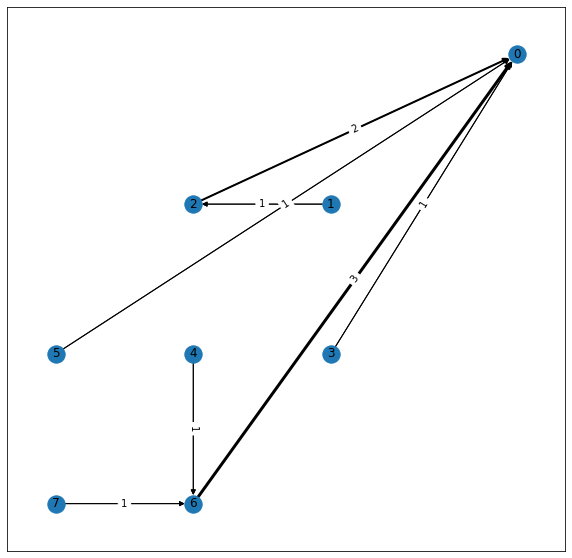

In [101]:
x_prime, best = parse_best(sampleset,x,s) 

#print(x_prime, s_prime, best)
    

final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

#print(str(final_index // Q))
#print(str(final_index % Q))

for item in x_prime:
    #print(item)
    
    index, level = item
    
    final_G.add_weighted_edges_from([(*edge, level) for edge, label in compelete_label.items() if label == index ])
    


    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)